Use seaborn's load_dataset function to load the iris database to answer the following questions:

In [1]:
# pandas for tabular data manipulation
import pandas as pd

# numpy for vectorized matrix operations
import numpy as np

# matplotlib.pyplot for basic matplotlib functionality
import matplotlib.pyplot as plt

# seabon for more visualizations! 
import seaborn as sns

In [6]:
df = sns.load_dataset('iris')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,versicolor
65,6.7,3.1,4.4,1.4,versicolor
13,4.3,3.0,1.1,0.1,setosa
121,5.6,2.8,4.9,2.0,virginica
49,5.0,3.3,1.4,0.2,setosa
134,6.1,2.6,5.6,1.4,virginica
20,5.4,3.4,1.7,0.2,setosa
47,4.6,3.2,1.4,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


What does the distribution of petal lengths look like?

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


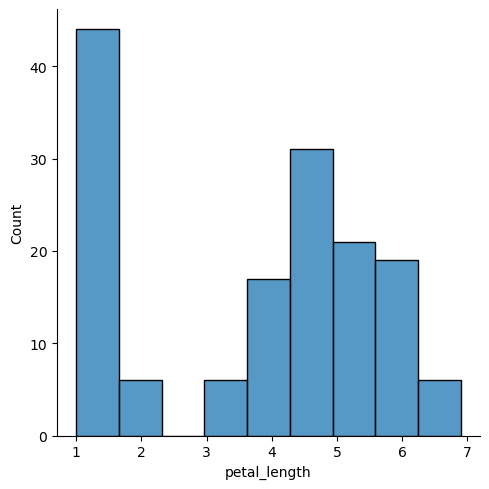

In [43]:
sns.displot(df.petal_length);

Is there a relationship between petal length and petal width?

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


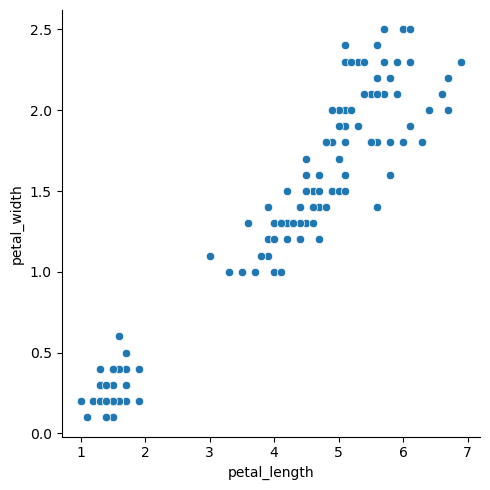

In [8]:
sns.relplot(data=df, x='petal_length', y='petal_width') # looks like there is a relationship between them
plt.show()

Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


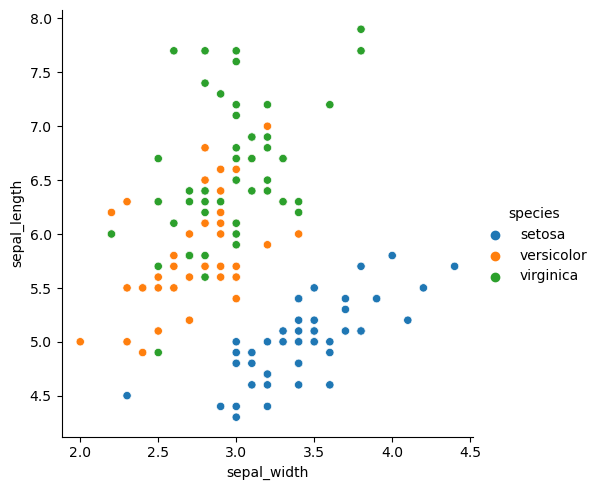

In [44]:
sns.relplot(data=df, x='sepal_width', y='sepal_length', hue='species') # it would be somewhat reasonable, but not extremely precise
plt.show()

Which features would be best used to predict species?

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


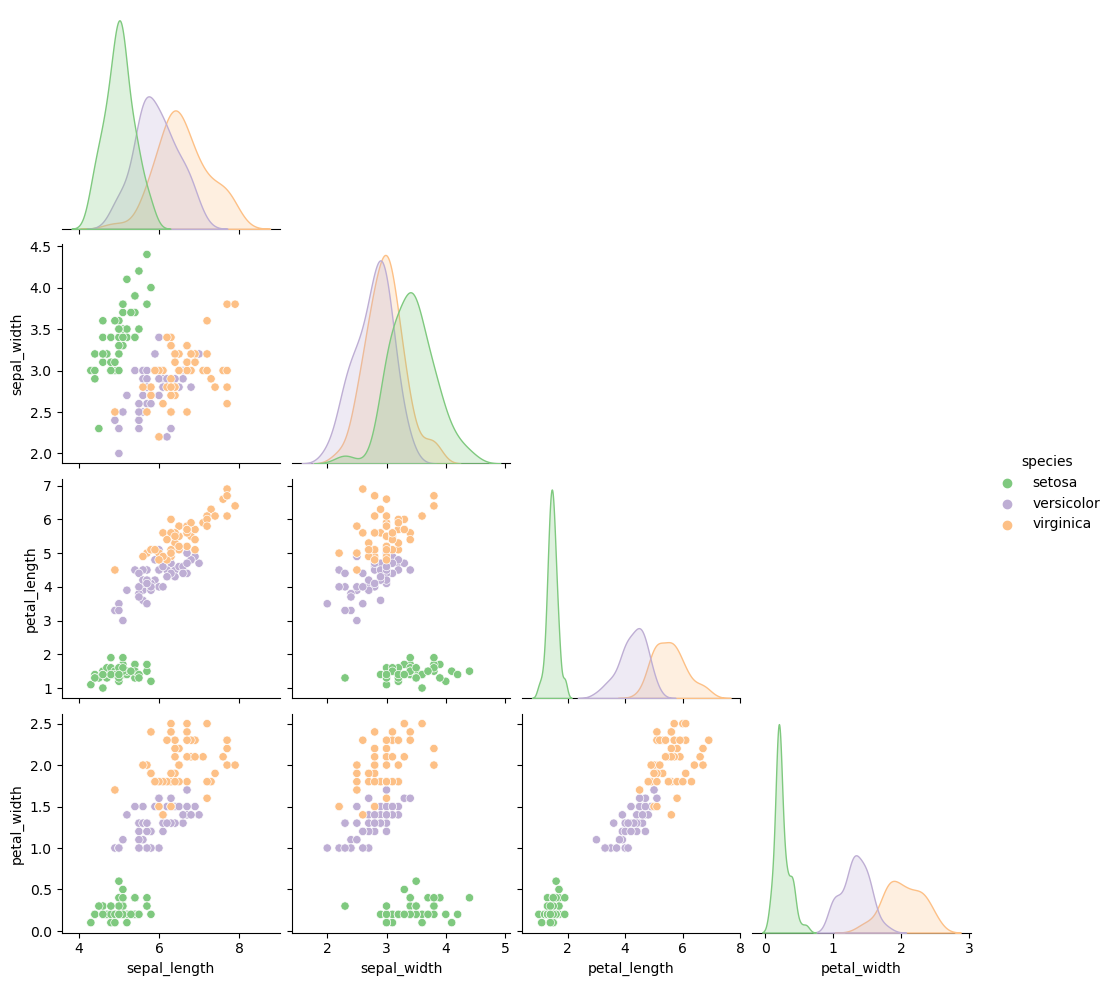

In [11]:
sns.pairplot(df, hue='species', corner=True, palette='Accent')
plt.show()

Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [22]:
df1 = sns.load_dataset('anscombe')
df1.sample(12)

,dataset,x,y
14,II,9.0,8.77
42,IV,8.0,7.91
2,I,13.0,7.58
0,I,10.0,8.04
6,I,6.0,7.24
7,I,4.0,4.26
10,I,5.0,5.68
36,IV,8.0,8.84
16,II,14.0,8.10
29,III,4.0,5.39


In [17]:
grouped = df1.groupby("dataset")

In [18]:
grouped.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


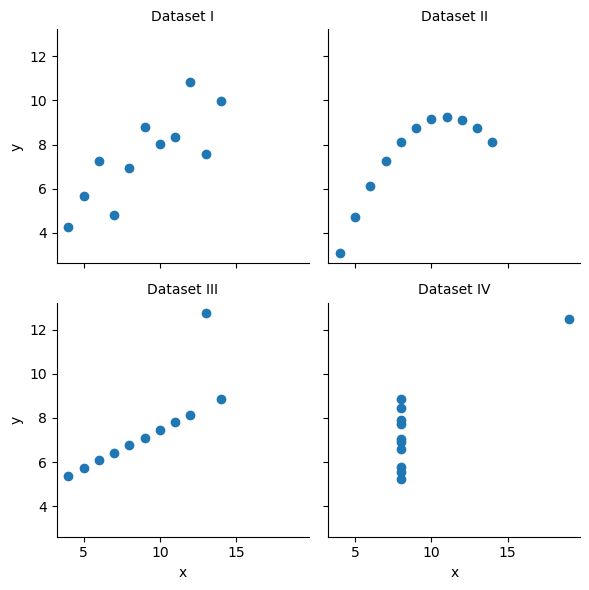

In [23]:
# Set up a grid of subplots (one for each dataset)
g = sns.FacetGrid(df1, col="dataset", col_wrap=2)

# Plot the x and y values for each dataset
g.map(plt.scatter, "x", "y")

# Add labels and titles
g.set_axis_labels("x", "y")
g.set_titles("Dataset {col_name}")

# Show the plots
plt.show()

Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [27]:
from pydataset import data

In [45]:
df2 = data('InsectSprays')
df2.sample(12)

,count,spray
68,10,F
5,14,A
24,13,B
29,3,C
55,1,E
7,10,A
59,6,E
31,2,C
22,21,B
36,4,C


In [29]:
data("InsectSprays", show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

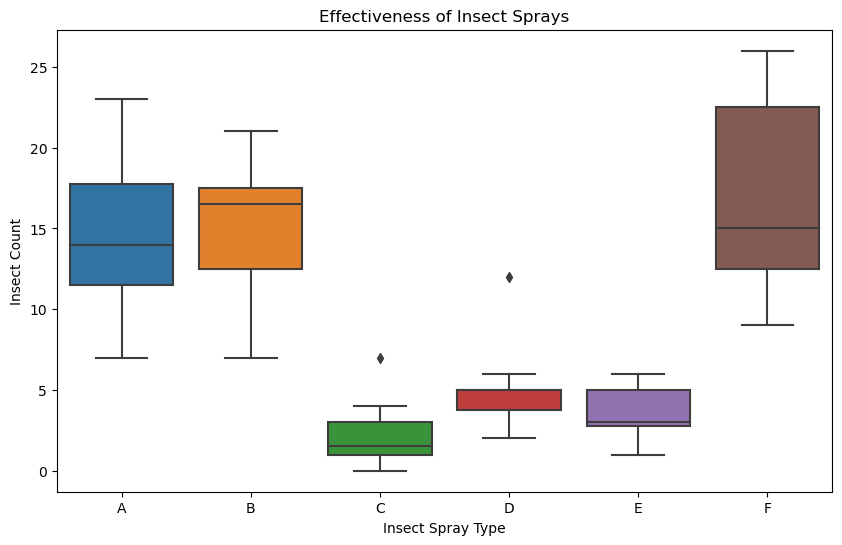

In [31]:
# Create a boxplot to visualize the effectiveness of different insect sprays
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x="spray", y="count")
plt.title("Effectiveness of Insect Sprays")
plt.xlabel("Insect Spray Type")
plt.ylabel("Insect Count")
plt.show()

Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:

Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [33]:
df3 = data('swiss')
df3.sample(10)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Broye,83.8,70.2,16,7,92.85,23.6
Rolle,60.5,60.8,16,10,7.72,16.3
Boudry,70.4,38.4,26,12,5.62,20.3
Herens,77.3,89.7,5,2,100.00,18.3
Monthey,79.4,64.9,7,3,98.22,20.2
Cossonay,61.7,69.3,22,5,2.82,18.7
Avenches,68.9,60.7,19,12,4.43,22.7
Martigwy,70.5,78.2,12,6,98.96,19.4
Le Locle,72.7,16.7,22,13,11.22,18.9
Val de Ruz,77.6,37.6,15,7,4.97,20.0


In [34]:
data("swiss", show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

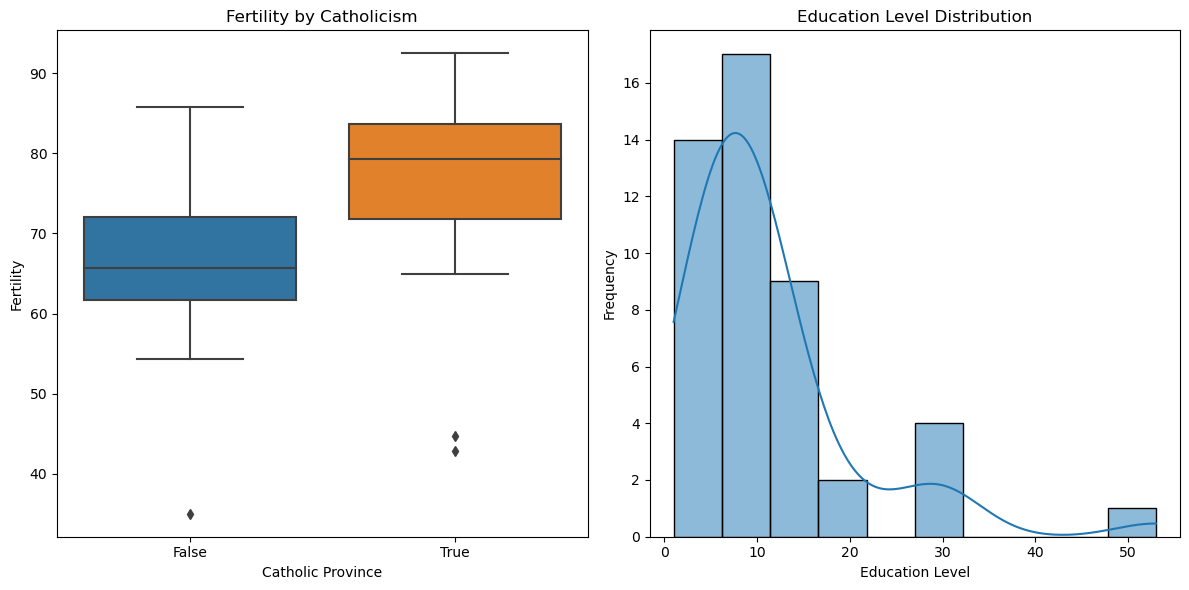

In [46]:
# Create an attribute is_catholic
cutoff = 50  # Choose a cutoff point (you can adjust this)
df3["is_catholic"] = df3["Catholic"] > cutoff

# Create visualizations
plt.figure(figsize=(12, 6))

# Visualization 1: Boxplot of Fertility by Catholicism
plt.subplot(1, 2, 1)
sns.boxplot(data=df3, x="is_catholic", y="Fertility")
plt.title("Fertility by Catholicism")
plt.xlabel("Catholic Province")
plt.ylabel("Fertility")

# Visualization 2: Histogram of Education
plt.subplot(1, 2, 2)
sns.histplot(data=df3, x="Education", bins=10, kde=True)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Does whether or not a province is Catholic influence fertility?

In [40]:
# Yes it does have influence on fertility.

What measure correlates most strongly with fertility?

In [47]:
df3.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


<Axes: >

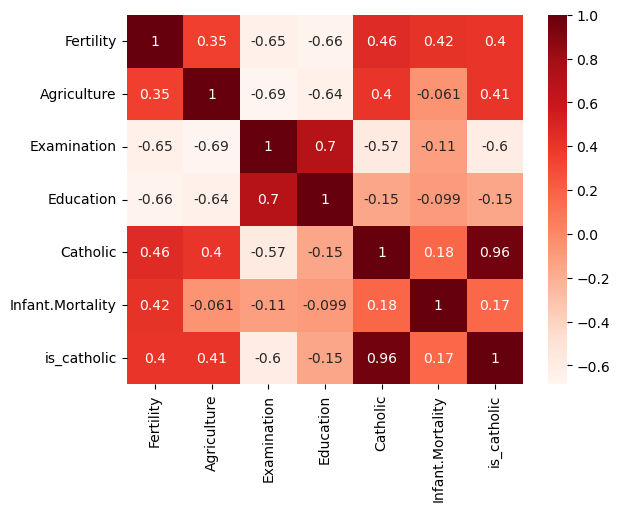

In [51]:
sns.heatmap(df3.corr(), cmap='Reds', annot=True)

Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [78]:
import pandas as pd
import numpy as np
import env

In [79]:
from env import host, username, password

url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/chipotle'

In [80]:
query = 'select * from orders'

In [81]:
df = pd.read_sql(query, url)

In [82]:
df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [83]:
# do your stip function here
df.item_price = df.item_price.str.strip('$').astype(float)

In [84]:
items_df = df.groupby('item_name')[['quantity','item_price']].sum()

In [85]:
top_items = items_df.sort_values('quantity', ascending=False).head(4)
top_items

,quantity,item_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43


<Axes: xlabel='item_name', ylabel='item_price'>

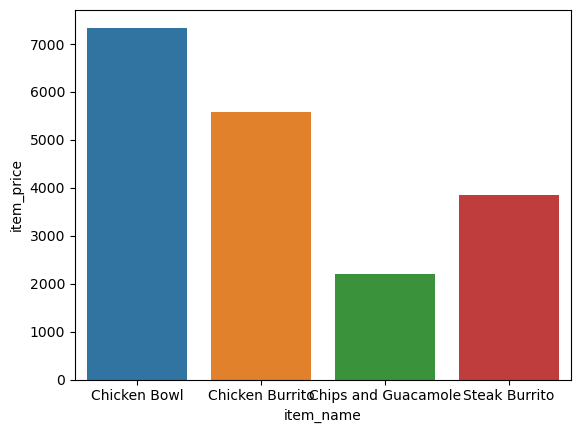

In [86]:
sns.barplot(data=top_items, y = 'item_price', x= top_items.index )

Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [68]:
df = data('sleepstudy')
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [69]:
df.Subject = df.Subject.astype(str)

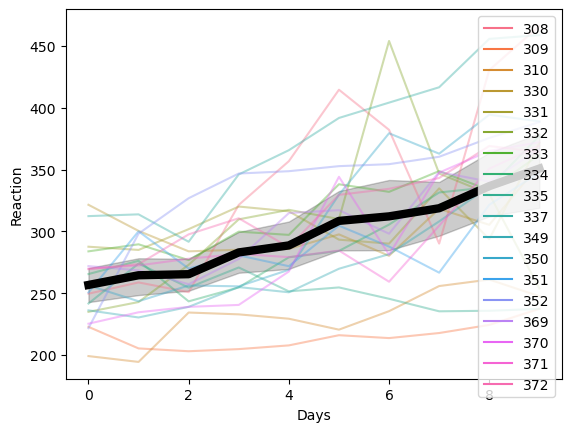

In [76]:
#plt.figure(figsize(10,8))
sns.lineplot(data=df, x='Days', y = 'Reaction', hue='Subject', alpha=0.4)
sns.lineplot(data=df, x='Days', y = 'Reaction', c = 'black', linewidth=6)
plt.show()